
### Supervised Learning
### Activity: Building a Student Intervention System

### Question 1 - Classification vs. Regression
*Your goal for this project is to identify students who might need early intervention before they fail or pass. Which type of supervised learning problem is this, classification or regression? Why?*

**Answer: ** 

This is a classifcation type supervised learning problem which models to predict if a student passes or fails the final examination. Classification is a technique for determining which class the dependent feature belongs to based on one or more independent variables.

### Question-2
load necessary Python libraries and load the student data. Note that the last column from this dataset, `'passed'`, will be our target label (whether the student graduated or didn't graduate). All other columns are features about each student.

In [164]:
# Import libraries
import numpy as np
import pandas as pd
from sklearn.metrics import f1_score
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings("ignore")

In [165]:
# Read student data
data = pd.read_csv("student-data.csv")
print("Student data read successfully!")

Student data read successfully!


In [166]:
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,passed
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,no
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,no
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,yes
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,yes
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,yes


### Question-3
Let's begin by investigating the dataset to determine how many students we have information on, and learn about the graduation rate among these students. In the code cell below, you will need to compute the following:
- The total number of students, `n_students`.
- The total number of features for each student, `n_features`.
- The number of those students who passed, `n_passed`.
- The number of those students who failed, `n_failed`.
- The graduation rate of the class, `grad_rate`, in percent (%).


In [167]:
# Calculate number of students
n_students = data.shape[0]

In [168]:
# Calculate number of features
n_features = data.shape[1]

In [169]:
# Calculate passing students
n_passed = data[data['passed'] == 'yes'].shape[0]

In [170]:
# Calculate failing students
n_failed = data[data['passed'] == 'no'].shape[0]

In [171]:
# Calculate graduation rate
grad_rate = n_passed/n_students *100

In [172]:
# Print the results
print('The total number of students = ', n_students)
print('The total number of features for each student = ', n_features)
print('The number of those students who passed = ', n_passed)
print('The number of those students who failed = ', n_failed)
print('The graduation rate of the class = {:.2f}%'.format(grad_rate), '%')

The total number of students =  395
The total number of features for each student =  31
The number of those students who passed =  265
The number of those students who failed =  130
The graduation rate of the class = 67.09% %


## Preparing the Data
you will prepare the data for modeling, training and testing.

### Question-4 Identify feature and target columns


separate the student data into feature and target columns to see if any features are non-numeric.

In [173]:
# Extract feature columns

In [174]:
feature_cols = list(data.columns[:-1])

In [175]:
# Extract target column 'passed'

In [176]:
target_col = data.columns[-1] 

In [177]:
print("Feature columns:\n\n",feature_cols)
print("\nTarget column: ",target_col)

Feature columns:

 ['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences']

Target column:  passed


In [178]:
# Separate the data into feature data and target data (X and y, respectively)

In [179]:
x = data.drop('passed', axis = 1)
y = pd.DataFrame(data['passed'])

### Question-5 Preprocess Feature Columns

As you can see, there are several non-numeric columns that need to be converted! Many of them are simply `yes`/`no`, e.g. `internet`. These can be reasonably converted into `1`/`0` (binary) values.

Other columns, like `Mjob` and `Fjob`, have more than two values, and are known as _categorical variables_. The recommended way to handle such a column is to create as many columns as possible values (e.g. `Fjob_teacher`, `Fjob_other`, `Fjob_services`, etc.), and assign a `1` to one of them and `0` to all others.

These generated columns are sometimes called _dummy variables_, and we will use the [`pandas.get_dummies()`](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html?highlight=get_dummies#pandas.get_dummies) function to perform this transformation. Run the code cell below to perform the preprocessing routine discussed in this section.

In [180]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 31 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [181]:
data.isna().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
passed        0
dtype: int64

In [182]:
data.school.unique()

array(['GP', 'MS'], dtype=object)

In [183]:
data.address.unique()

array(['U', 'R'], dtype=object)

In [184]:
data.famsize.unique()

array(['GT3', 'LE3'], dtype=object)

In [185]:
data.Pstatus.unique()

array(['A', 'T'], dtype=object)

In [186]:
data.schoolsup.unique()

array(['yes', 'no'], dtype=object)

In [187]:
data.famsup.unique()

array(['no', 'yes'], dtype=object)

In [188]:
data.paid.unique()

array(['no', 'yes'], dtype=object)

In [189]:
data.activities.unique()

array(['no', 'yes'], dtype=object)

In [190]:
data.nursery.unique()

array(['yes', 'no'], dtype=object)

In [191]:
data.higher.unique()

array(['yes', 'no'], dtype=object)

In [192]:
data.internet.unique()

array(['no', 'yes'], dtype=object)

In [193]:
data.romantic.unique()

array(['no', 'yes'], dtype=object)

In [194]:
#Label Encoding features school, sex, address, famsize, Pstatus, schoolsup, famsup, paid, activities, nursery, higher, internet, romantic
label_en = LabelEncoder()
a = ['school', 'sex', 'address', 'famsize', 'Pstatus', 'schoolsup','famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']
for i in np.arange(len(a)):
    x[a[i]] = label_en.fit_transform(x[a[i]])
x.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences
0,0,0,18,1,0,0,4,4,at_home,teacher,course,mother,2,2,0,1,0,0,0,1,1,0,0,4,3,4,1,1,3,6
1,0,0,17,1,0,1,1,1,at_home,other,course,father,1,2,0,0,1,0,0,0,1,1,0,5,3,3,1,1,3,4
2,0,0,15,1,1,1,1,1,at_home,other,other,mother,1,2,3,1,0,1,0,1,1,1,0,4,3,2,2,3,3,10
3,0,0,15,1,0,1,4,2,health,services,home,mother,1,3,0,0,1,1,1,1,1,1,1,3,2,2,1,1,5,2
4,0,0,16,1,0,1,3,3,other,other,home,father,1,2,0,0,1,1,0,1,1,0,0,4,3,2,1,2,5,4


In [195]:
data.Mjob.unique()

array(['at_home', 'health', 'other', 'services', 'teacher'], dtype=object)

In [196]:
data.Fjob.unique()

array(['teacher', 'other', 'services', 'health', 'at_home'], dtype=object)

In [197]:
data.reason.unique()

array(['course', 'other', 'home', 'reputation'], dtype=object)

In [198]:
data.guardian.unique()

array(['mother', 'father', 'other'], dtype=object)

In [199]:
#One Hot Encoding features Fjob, Mjob, reason and guardian
Mjob_en = pd.get_dummies(x['Mjob'], prefix = 'Mjob')
Fjob_en = pd.get_dummies(x['Fjob'], prefix = 'Fjob')
reason_en = pd.get_dummies(x['reason'], prefix = 'reason')
guardian_en = pd.get_dummies(x['guardian'], prefix = 'guardian')
x = pd.concat([x,Mjob_en, Fjob_en, reason_en, guardian_en], axis = 1)
x = x.drop(['Mjob','Fjob','reason','guardian'], axis =1)
pd.set_option('display.max_columns', None)
x.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,Mjob_at_home,Mjob_health,Mjob_other,Mjob_services,Mjob_teacher,Fjob_at_home,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher,reason_course,reason_home,reason_other,reason_reputation,guardian_father,guardian_mother,guardian_other
0,0,0,18,1,0,0,4,4,2,2,0,1,0,0,0,1,1,0,0,4,3,4,1,1,3,6,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0
1,0,0,17,1,0,1,1,1,1,2,0,0,1,0,0,0,1,1,0,5,3,3,1,1,3,4,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0
2,0,0,15,1,1,1,1,1,1,2,3,1,0,1,0,1,1,1,0,4,3,2,2,3,3,10,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0
3,0,0,15,1,0,1,4,2,1,3,0,0,1,1,1,1,1,1,1,3,2,2,1,1,5,2,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0
4,0,0,16,1,0,1,3,3,1,2,0,0,1,1,0,1,1,0,0,4,3,2,1,2,5,4,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0


### Question - 6 Implementation: Training and Testing Data Split
So far, we have converted all _categorical_ features into numeric values. For the next step, we split the data (both features and corresponding labels) into training and test sets. you will need to implement the following:
- Randomly shuffle and split the data (`X`, `y`) into training and testing subsets.
  - Use 300 training points (approximately 75%) and 95 testing points (approximately 25%).
  - Set a `random_state` for the function(s) you use, if provided.
  - Store the results in `X_train`, `X_test`, `y_train`, and `y_test`.

In [200]:
# splitting the data into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state = 2, train_size = 0.7595, test_size = 0.2405)
print(len(X_train),len(X_test),len(y_train),len(y_test))

300 95 300 95


In [201]:
# Show the results of the split
print("Training set has ",X_train.shape[0], " samples.")
print("Testing set has ",X_test.shape[0], " samples.")

Training set has  300  samples.
Testing set has  95  samples.


### Question - 7  Training and Evaluating Models
In this section, you will choose 3 supervised learning models that are appropriate for this problem and available in `scikit-learn`. You will first discuss the reasoning behind choosing these three models by considering what you know about the data and each model's strengths and weaknesses. You will then fit the model to varying sizes of training data and measure the accuracy score.

The following supervised learning models are currently available in scikit-learn that you may choose from:
<ol>
<li>Gaussian Naive Bayes (GaussianNB)</li>
<li>Decision Trees</li>
<li>Ensemble Methods (Bagging, AdaBoost, Random Forest, Gradient Boosting)</li>
<li>K-Nearest Neighbors (KNeighbors)</li>
<li>Stochastic Gradient Descent (SGDC)</li>
<li>Support Vector Machines (SVM)</li>
<li>Logistic Regression</li>
</ol>

###  Model Application
*List three supervised learning models that are appropriate for this problem. What are the general applications of each model? What are their strengths and weaknesses? Given what you know about the data, why did you choose these models to be applied?*

In [202]:
#explaination

3 supervised learning models that are appropriate for this problem and available in scikit-learn are:
<ul>
  <li>Random Forest</li>
  <li>Adaboost</li>
  <li>Logistic Regression</li>
</ul>

<h3>1. Random Forest</h3>
<ul>
    <li>This classifier is used in fields like credit scoring, crime risk, medical diagnosis, failure prediction etc.</li>
    <li>Not prone to overfit and not computationally expensive which is what we want, to take less time.</li>
    <li>They’re not easily interpretable.</li>
    <li>Random forest are not prone to overfit as we have lots features containing integers, categorical and binary.</li>
    <li>This eliminates the risk of overfitting and not computationally expensive as advised by supervisors.</li>
</ul>
<h3>2. AdaBoost</h3>
<ul>
    <li>This classifier is used in fileds biology, speech processing, computer vision etc.</li>
    <li>Less tuning of parameters required and computational friendly.</li>
    <li>Sensitive to noisy data and outliers.</li>
</ul>
<h3>3. Logistic Regression</h3>
<ul>
    <li>Used in Financial forecasting, Software cost prediction, software effort prediction and software quality assurance, etc</li>
    <li>It doesn't assume a linear relationship between the features and target variable.</li>
    <li>It requires large sample size in order to perform well.</li>
</ul>

In [203]:
# Import the three supervised learning models from sklearn
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

In [204]:
# fit model-1  on traning data ----- Rain Forest Classifier

In [205]:
rf = RandomForestClassifier()

In [206]:
rf.fit(X_train,np.ravel(y_train,order='C'))

RandomForestClassifier()

In [207]:
# predict on the test data 

In [208]:
y_pred = rf.predict(X_test)

In [209]:
# calculate the accuracy score

In [210]:
print("Accuracy of Random Forest Classifier is: ", accuracy_score(y_test,y_pred))

Accuracy of Random Forest Classifier is:  0.7157894736842105


In [211]:
# fit the model-2 on traning data and predict on the test data and measure the accuracy ----- Adaboost Classifier

In [212]:
adaboost = AdaBoostClassifier(n_estimators=100, base_estimator= None,learning_rate=1, random_state = 1)
adaboost.fit(X_train,np.ravel(y_train,order='C'))
y_pred = adaboost.predict(X_test)
print("Accuracy of Adaboost Classifier is: ", accuracy_score(y_test,y_pred))

Accuracy of Adaboost Classifier is:  0.7473684210526316


In [213]:
# fit the model-3 on traning data and predict on the test data and measure the accuracy

In [214]:
logit_model = LogisticRegression()
logit_model.fit(X_train, np.ravel(y_train,order='C'))
y_pred = logit_model.predict(X_test)
print("Accuracy of Logistic Regression Classifier is: ", accuracy_score(y_test,y_pred))

Accuracy of Logistic Regression Classifier is:  0.7368421052631579


LR: 0.663333 (0.101598)
RF: 0.690000 (0.097809)
AB: 0.666667 (0.073030)


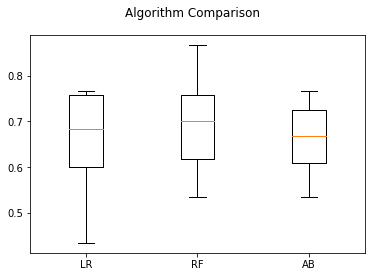

In [215]:
from sklearn import model_selection
import matplotlib.pyplot as plt
# prepare configuration for cross validation test harness
seed = 7
# prepare models
models = []
models.append(('LR', LogisticRegression()))
models.append(('RF', RandomForestClassifier()))
models.append(('AB', AdaBoostClassifier()))
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
	kfold = model_selection.KFold(n_splits=10, random_state=seed, shuffle = True)
	cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

<h5>CONCLUSION:</h5> When we compare the accuracy score as well as the box plots of the cross validation score means of the three models used here we can see that Random Forest Classifier has done a great job. So I conclude that Random Forest Algorithm is the best fit algorithm for the predictions on this student intervension dataset. 

<h5>Submitted by: GROUP 8(Anand M Nair, Ashwanth v, Midhuna Prasad R, Shyma S, Zeenath M)</h5>
<h5>Submitted on: 16-01-2022</h5>
<h5>NORKA DSA BATCH 02 2021</h5>